# Cogs 108 Final Project

Bernard Suwirjo

Ben Hazarian

Cesar Reyes

Eric Jiang

Gauthier Pred'Astor Gris

In [128]:
# Necessary Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

In [129]:
# Load Datasets

# Baseball Dataset
#NFL_frame = pd.read_csv('data/NFL_16_17.csv')
NFL_frame = pd.read_csv('data/nfl_16.csv')
NFL_frame.head()

,Week,Day,Date,Time,Winner/tie,Unnamed: 5,Loser/tie,Unnamed: 7,Pts,Pts.1,YdsW,TOW,YdsL,TOL
0,1,Thu,September 8,8:40PM,Denver Broncos,NaN,Carolina Panthers,boxscore,21,20,307,3,333,1
1,1,Sun,September 11,1:04PM,Green Bay Packers,@,Jacksonville Jaguars,boxscore,27,23,294,0,348,1
2,1,Sun,September 11,1:04PM,Baltimore Ravens,NaN,Buffalo Bills,boxscore,13,7,308,1,160,0
3,1,Sun,September 11,1:05PM,Houston Texans,NaN,Chicago Bears,boxscore,23,14,344,1,258,1
4,1,Sun,September 11,1:05PM,Kansas City Chiefs,NaN,San Diego Chargers,boxscore,33,27,413,1,388,0


Data cleaning

In [130]:
NFL_frame = NFL_frame.drop(columns=['Day','Time','Date', 'Unnamed: 7'])
NFL_frame.rename(columns={'Unnamed: 5':'Home_play'}, inplace=True)

Putting 1 if winning team played at home and 0 otherwise

In [131]:
for index, row in NFL_frame.iterrows():
    if row['Home_play'] =='@':
        NFL_frame.set_value(index, 'Home_play', 0)
    else:
        NFL_frame.set_value(index, 'Home_play', 1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


Remove ties

In [132]:
NFL_frame.head()
NFL_frame = NFL_frame.loc[NFL_frame['Pts']!=NFL_frame['Pts.1']]

Adding score difference

In [135]:
NFL_frame['score_diff'] = NFL_frame['Pts'] - NFL_frame['Pts.1']

Home/away win/loss + score diff

In [137]:
df_home = NFL_frame.loc[NFL_frame['Home_play']==1]
df_away = NFL_frame.loc[NFL_frame['Home_play']==0]

df_win_home = df_home.groupby('Winner/tie')['Home_play'].count()
df_win_away = df_away.groupby('Winner/tie')['Home_play'].count()

df_loss_home = df_away.groupby('Loser/tie')['Home_play'].count()
df_loss_away = df_home.groupby('Loser/tie')['Home_play'].count()

home_score_diff = df_home.groupby('Winner/tie').mean()['score_diff']
away_score_diff = df_away.groupby('Winner/tie').mean()['score_diff']


df_total = df_loss_home + df_loss_away + df_win_home + df_win_away

In [138]:
data = {'home_win': df_win_home,'home_win_diff': home_score_diff, 'away_win': df_win_away,'away_win_diff': away_score_diff, 'home_loss': df_loss_home, 'away_loss': df_loss_away, 'nb_games': df_total}
df_results = pd.DataFrame(data)
df_results.fillna(0, inplace=True)

df_results.head()

,home_win,home_win_diff,away_win,away_win_diff,home_loss,away_loss,nb_games
Arizona Cardinals,4,17.25,3.0,17.666667,3,5.0,15.0
Atlanta Falcons,5,13.80,6.0,14.500000,3,2.0,16.0
Baltimore Ravens,6,12.00,2.0,3.500000,2,6.0,16.0
Buffalo Bills,4,17.75,3.0,10.333333,4,5.0,16.0
Carolina Panthers,4,11.00,2.0,7.000000,4,6.0,16.0


Win percentages

Text(0.5, 0, 'Team')

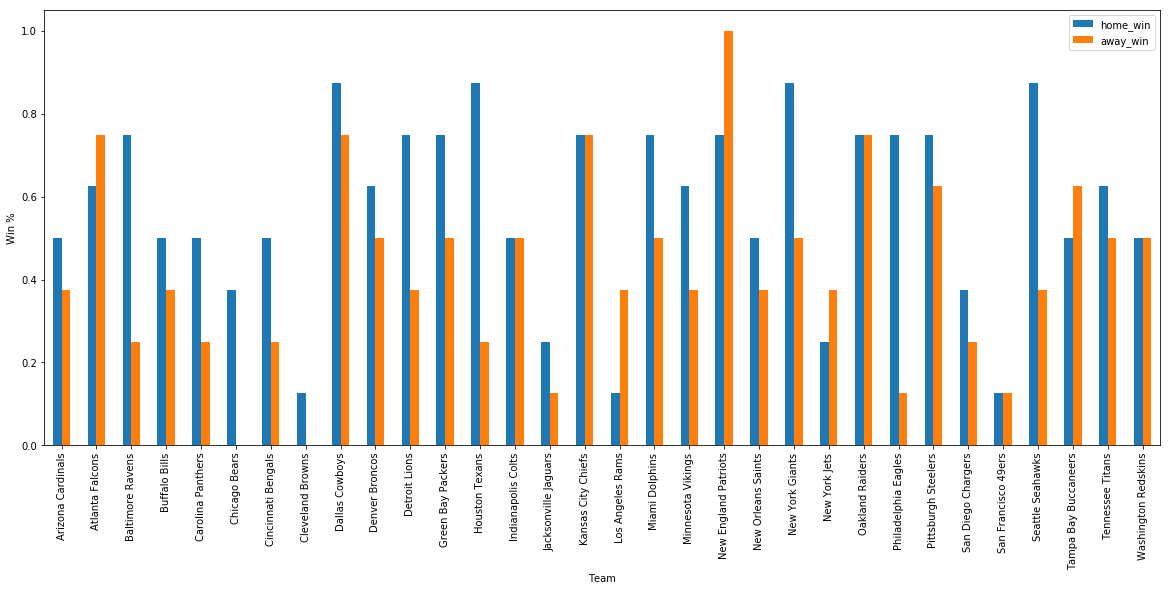

In [139]:
win_percentages = (df_results[['home_win', 'away_win']]/8).plot.bar(figsize=(20,8))
win_percentages.set_ylabel("Win %")
win_percentages.set_xlabel("Team")

Average score difference

Text(0.5, 0, 'Team')

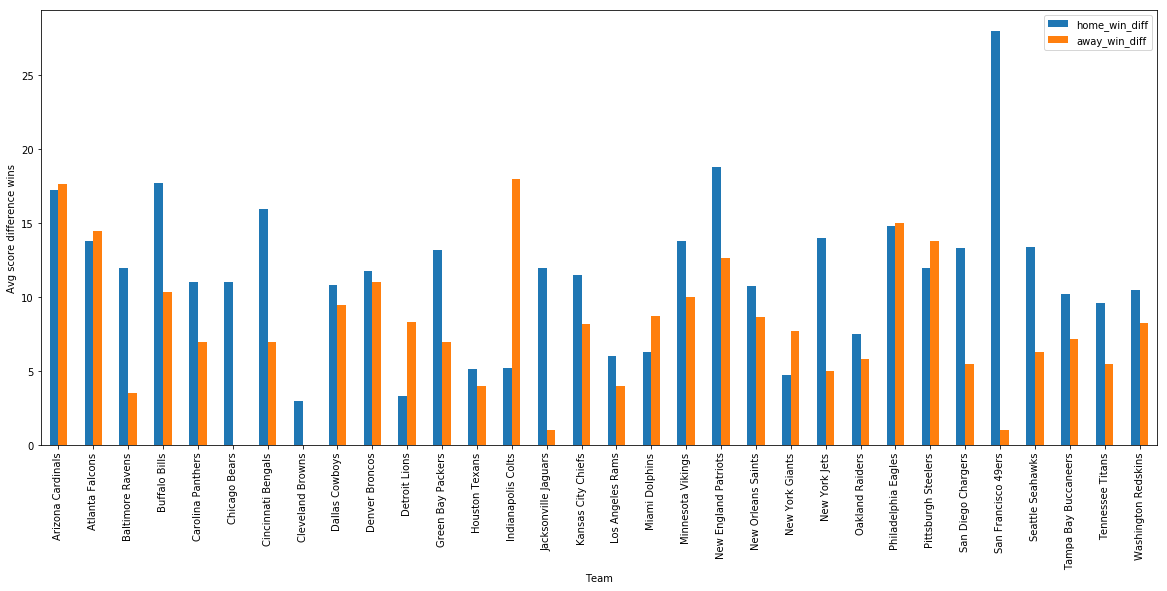

In [141]:
score_win_diff = df_results[['home_win_diff', 'away_win_diff']].plot.bar(figsize=(20,8))
score_win_diff.set_ylabel("Avg score difference wins")
score_win_diff.set_xlabel("Team")

In [142]:
len(df_results .loc[df_results ['home_win_diff'] > df_results ['away_win_diff']])

24

24 teams with higher home than 